### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### Import Data & Rename Columns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_Short = df[['Spending_Score','Income']]

### Elbow Method to Indetify Clusters¶

In [6]:
from sklearn.cluster import KMeans


### Run Cluster Analysis 12 times
We run the Cluster Analysis using Cluster as 1 till 12. Also, we store the WSS Scores. The WSS score will be used to create the Elbow Plot
WSS = Within-Cluster-Sum of Squared

In [7]:
K=range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\Amol Kamble\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
wss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25063.652515864094,
 21794.885609098194,
 19641.456216651564,
 17602.190468386776]

### We Store the Number of clusters along with their WSS Scores in a DataFrame

In [9]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37265.865205
6,7,30273.394312
7,8,25063.652516
8,9,21794.885609
9,10,19641.456217


### Plot Elbow Plot

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

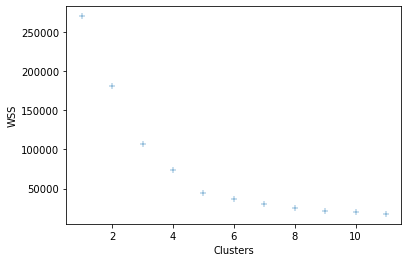

In [10]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 5 Clusters

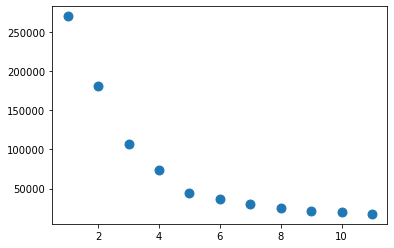

In [11]:
plt.scatter(mycenters['Clusters'],mycenters['WSS'],s=80)

### ---5 Clusters Identified as per Elbow Method

## Silhouette Method to Indentify Clusters

In [12]:
import sklearn.metrics as metrics

In [13]:
for i in range(3,13):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=200)
    kmeans.fit(df_Short)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.5379675585622219
Silhouette score for k(clusters) = 7 is 0.5367379891273258
Silhouette score for k(clusters) = 8 is 0.4592958445675391
Silhouette score for k(clusters) = 9 is 0.45770857148861777
Silhouette score for k(clusters) = 10 is 0.446735677440187
Silhouette score for k(clusters) = 11 is 0.4472950813160941
Silhouette score for k(clusters) = 12 is 0.4257901147260263


In [14]:
kmeans.labels_

array([ 3,  4, 10,  4,  3,  4, 10,  4, 10,  4, 10,  4, 10,  4, 10,  4,  3,
        4,  3,  4,  3,  4, 10,  4, 10,  4,  3,  5,  3,  4, 10,  4, 10,  4,
       10,  4, 10,  4,  3,  4,  3,  4,  3,  5,  3,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0, 11,  0, 11,
        0,  0, 11,  0,  6, 11,  9, 11,  6,  8,  9,  8,  9, 11,  9,  8,  6,
        8,  9,  8,  9,  8,  6, 11,  6,  8,  6, 11,  9,  8,  6,  8,  6,  8,
        9,  8,  6,  8,  9,  8,  9, 11,  6,  8,  6,  1,  9,  1,  6,  1,  9,
        8,  9,  8,  6,  8,  6,  1,  9,  1,  6,  1,  2,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  7,  2,  7,  2,  7,  2,  7,  2])

In [15]:
labels

array([ 3,  4, 10,  4,  3,  4, 10,  4, 10,  4, 10,  4, 10,  4, 10,  4,  3,
        4,  3,  4,  3,  4, 10,  4, 10,  4,  3,  5,  3,  4, 10,  4, 10,  4,
       10,  4, 10,  4,  3,  4,  3,  4,  3,  5,  3,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0, 11,  0, 11,
        0,  0, 11,  0,  6, 11,  9, 11,  6,  8,  9,  8,  9, 11,  9,  8,  6,
        8,  9,  8,  9,  8,  6, 11,  6,  8,  6, 11,  9,  8,  6,  8,  6,  8,
        9,  8,  6,  8,  9,  8,  9, 11,  6,  8,  6,  1,  9,  1,  6,  1,  9,
        8,  9,  8,  6,  8,  6,  1,  9,  1,  6,  1,  2,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  7,  2,  7,  2,  7,  2,  7,  2])

### --- Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

### Perform K-Mean Clustering with 5 Clusters

In [16]:
# We will use 2 Variables for this example
kmeans = KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

### Plot Clusters on Chart

In [17]:
df['Clusters'] = kmeans.labels_

In [18]:
df[0:10]

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
5,6,Female,22,17,76,1
6,7,Female,35,18,6,3
7,8,Female,23,18,94,1
8,9,Male,64,19,3,3
9,10,Female,30,19,72,1


<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

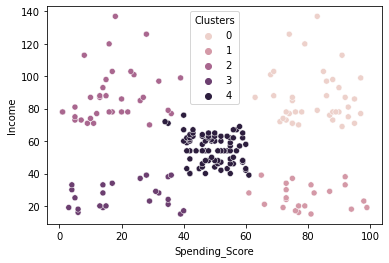

In [19]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

## END 